# Attribution and Motifs Detection with Decima

This documentation demonstrates how to use Decima's attribution analysis capabilities to identify important regulatory regions in genomic sequences and discover transcription factor binding motifs within those regions. Attribution analysis helps reveal which parts of the DNA sequence most strongly influence gene expression predictions, while **motif scanning** can identify specific transcription factor binding sites in these regions of interest.


## CLI API

Let's look at a simple example using Decima's CLI API to analyze the SPI1 and BRD3 genes. SPI1 is a key transcription factor in myeloid cell development. We'll examine its regulation across different monocyte and macrophage cell types where it is known to be important.

In [1]:
! decima attributions --help

Usage: decima attributions [OPTIONS]

  Generate and save attribution analysis results for a gene or a set of
  sequences.

  Output files:

      ├── {output_prefix}.attributions.h5      # Raw attribution score matrix
      per gene.

      ├── {output_prefix}.attributions.bigwig  # Genome browser track of
      attribution as bigwig file.

      ├── {output_prefix}.seqlets.bed          # List of attribution peaks in
      BED format.

      ├── {output_prefix}.motifs.tsv           # Detected motifs in peak
      regions.

      └── {output_prefix}.warnings.qc.log      # QC warnings about prediction
      reliability.

  Examples:

      >>> decima attributions -o output_prefix -g SPI1

      >>> decima attributions -o output_prefix -g SPI1,CD68 --tasks "cell_type
      == 'classical monocyte'" --device 0

      >>> decima attributions -o output_prefix --seqs tests/data/seqs.fasta
      --tasks "cell_type == 'classical monocyte'" --device 0

Options:
  -o, --output-prefix TEXT        

This decima command analyzes gene attributions: `--genes "SPI1,BRD3"` specifies focusing on SPI1 and BRD3; `--tasks "cell_type == 'classical monocyte'"` filters the analysis to classical monocytes only; and `--output_prefix` output_classical_monoctypes/ designates the output directory for the results. You can also pass `--off-tasks` that are cell types used as a contrast group when analyzing cell type specificity - they represent the cell types you want to compare against when determining. If you do not pass, `--tasks` argument all avaliable cells will be used for attribution calculation.

In [2]:
! decima attributions --model 0 --genes "SPI1,BRD3" --tasks "cell_type == 'classical monocyte'" --output-prefix example/output_classical_monoctypes

decima - INFO - Using device: cuda
decima - INFO - Loading model and metadata to compute attributions...
wandb: Currently logged in as: mhcelik (mhcw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.6 (1904.8MB/s)
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.7 (1864.4MB/s)
wandb: Downloading large artifact rep0:latest, 720.03MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (1316.1MB/s)
/home/celikm5/Projects/decima/src/decima/interpret/attributer.py:43: UserWarning: `off_tasks` is not provided. Using all other tasks as off_tasks.
Computing attributions...: 100%|██████████████████| 2/2 [00:03<00:00,  1.84s/it]
decima - INFO - Loading model and metadata to compute attributions...
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
w

In [3]:
! ls example/output_classical_monoctypes*

example/output_classical_monoctypes.attributions.bigwig
example/output_classical_monoctypes.attributions.h5
example/output_classical_monoctypes.motifs.tsv
example/output_classical_monoctypes.seqlets.bed
example/output_classical_monoctypes.warnings.qc.log


In [4]:
import h5py

with h5py.File("example/output_classical_monoctypes.attributions.h5", "r") as f:
    print(f["genes"][:])
    print(f["sequence"][:].shape)
    print(f["attribution"][:].shape)

[b'SPI1' b'BRD3']
(2, 524288)
(2, 4, 524288)


In [5]:
! head  example/output_classical_monoctypes.seqlets.bed | column -t -s $'\t' 

chr11  47152015  47152022  neg.SPI1@-29953  3  .  -0.42814336717128754
chr11  47160163  47160167  neg.SPI1@-21805  3  .  -0.25199126452207565
chr11  47160309  47160319  neg.SPI1@-21659  3  .  -0.7467306312173605
chr11  47160323  47160333  neg.SPI1@-21645  3  .  -0.9774367886129767
chr11  47165053  47165060  neg.SPI1@-16915  3  .  -0.46786930691450834
chr11  47165593  47165606  pos.SPI1@-16375  3  .  1.7940459251403809
chr11  47165642  47165653  pos.SPI1@-16326  3  .  1.0624531591311097
chr11  47165653  47165664  neg.SPI1@-16315  3  .  -1.4263939633965492
chr11  47165664  47165670  neg.SPI1@-16304  3  .  -0.40090638771653175
chr11  47165690  47165703  pos.SPI1@-16278  3  .  1.1790284179151058


In [6]:
! tail example/output_classical_monoctypes.motifs.tsv | column -t -s $'\t' 

RARA.H13CORE.1.P.B        neg.BRD3@2651    166492  166511  -  7.690212368965149   0.000499333134939661   CTACCTTCCTCTACCCTCT      -0.00013111276999361028  -0.0005596191433799649  2652
RARA.H13CORE.1.P.B        neg.BRD3@32535   196372  196391  -  7.606964826583862   0.000499333134939661   TGAAGTTCCTCTCCCCTCC      -0.0005527154669260582   -0.0007040620484463215  32532
RARA.H13CORE.1.P.B        pos.BRD3@2657    166492  166511  -  7.690212368965149   0.000499333134939661   CTACCTTCCTCTACCCTCT      -0.00013111276999361028  -0.0005596191433799649  2652
SP1.H13CORE.0.P.B         pos.BRD3@46      163891  163905  -  4.692713022232056   0.000499375164508819   GCGCGCCGCCCCGC           -0.00021742627099488994  0.0003424161255357046   51
ANDR.H13CORE.2.P.B        neg.BRD3@2454    166291  166310  +  7.7568066120147705  0.0004996894640498803  TTTTTATTTTTGTTTTGTT      -0.0008813150420074204   -0.0014833488872296214  2451
ATOH1.H13CORE.0.P.B       pos.BRD3@6463    170307  170317  +  6.371594667434692  

QC file (`qc.warnings.log`) is a quality control log file that contains warnings about prediction reliability for genes. Specifically, it warns when a gene has low correlation with the model's predictions (Pearson correlation < 0.7).

In [7]:
! head output_classical_monoctypes.warnings.qc.log

head: cannot open 'output_classical_monoctypes.warnings.qc.log' for reading: No such file or directory


### CLI Subcommands 

The Decima CLI supports running the attribution analysis pipeline step by step using dedicated subcommands. 
This modular approach allows you to execute each stage of the workflow independently, such as:
1. Generating model predictions for selected genes and cell types (`attributions-predict`).
2. Calling significant seqlets from the attributions (`attributions-recursive-seqlet-calling`).
3. Visualizing the results and motif logos (`attributions-plot`).
By chaining these subcommands, you can customize, debug, or parallelize each step of the analysis as needed.

This cell demonstrates how to run the Decima CLI to generate attributions for selected genes and cell types. The following command runs the attributions-predict subcommand for model 0 and 1, focusing on the genes SPI1 and BRD3 in cells where the cell_type is 'classical monocyte'. The results are saved with the specified output prefix.

In [8]:
! decima attributions-predict --model 0 --genes "SPI1,BRD3" --tasks "cell_type == 'classical monocyte'" --output-prefix example/output_classical_monoctypes_0

decima - INFO - Using device: cuda
decima - INFO - Loading model and metadata to compute attributions...
wandb: Currently logged in as: mhcelik (mhcw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.6 (1899.6MB/s)
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.8 (1769.0MB/s)
wandb: Downloading large artifact rep0:latest, 720.03MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (1315.5MB/s)
/home/celikm5/Projects/decima/src/decima/interpret/attributer.py:43: UserWarning: `off_tasks` is not provided. Using all other tasks as off_tasks.
Computing attributions...: 100%|██████████████████| 2/2 [00:03<00:00,  1.84s/it]


In [9]:
! decima attributions-predict --model 1 --genes "SPI1,BRD3" --tasks "cell_type == 'classical monocyte'" --output-prefix example/output_classical_monoctypes_1

decima - INFO - Using device: cuda
decima - INFO - Loading model and metadata to compute attributions...
wandb: Currently logged in as: mhcelik (mhcw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.7 (1859.3MB/s)
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.6 (1901.0MB/s)
wandb: Downloading large artifact rep1:latest, 720.03MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (1387.3MB/s)
/home/celikm5/Projects/decima/src/decima/interpret/attributer.py:43: UserWarning: `off_tasks` is not provided. Using all other tasks as off_tasks.
Computing attributions...: 100%|██████████████████| 2/2 [00:03<00:00,  1.83s/it]


This cell runs the recursive seqlet calling step of the Decima attribution pipeline. It takes the attributions from two models (model 0 and model 1) for the genes SPI1 and BRD3in classical monocytes, and calls significant seqlets (regions with high attribution).

In [10]:
! decima attributions-recursive-seqlet-calling --attributions "example/output_classical_monoctypes_0.attributions.h5,example/output_classical_monoctypes_1.attributions.h5" --output-prefix example/output_classical_monoctypes

decima - INFO - Loading model and metadata to compute attributions...
wandb: Currently logged in as: mhcelik (mhcw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.7 (1844.8MB/s)
decima - INFO - No genes provided, using all 2 genes in the attribution files.
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.7 (1874.6MB/s)
Computing recursive seqlet calling...: 100%|█████| 2/2 [00:00<00:00, 846.31it/s]
/home/celikm5/miniforge3/envs/decima/lib/python3.11/site-packages/memelite/fimo.py:406: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation

The following cell runs the Decima CLI to generate plots for the attributions and discovered seqlets. It uses the output prefix from previous steps and generates visualizations for the specified genes (SPI1, BRD3), highlighting motif locations within 500bp of the transcription start site (TSS).

In [11]:
! decima attributions-plot --output-prefix example/output_classical_monoctypes -g "SPI1,BRD3" --tss-distance 500

Plotting attributions...:   0%|                           | 0/2 [00:00<?, ?it/s]wandb: Currently logged in as: mhcelik (mhcw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.7 (1864.1MB/s)
/home/celikm5/miniforge3/envs/decima/lib/python3.11/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 10 x 2 in image.
/home/celikm5/miniforge3/envs/decima/lib/python3.11/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: example/output_classical_monoctypes_plots/SPI1.peaks.png
Plotting attributions...:  50%|█████████▌         | 1/2 [00:13<00:13, 13.09s/it]wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.7 (1888.9MB/s)
/home/celikm5/miniforge3/envs/decima/lib/python3.11/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 10 x 2 in image.
/home/celikm5/

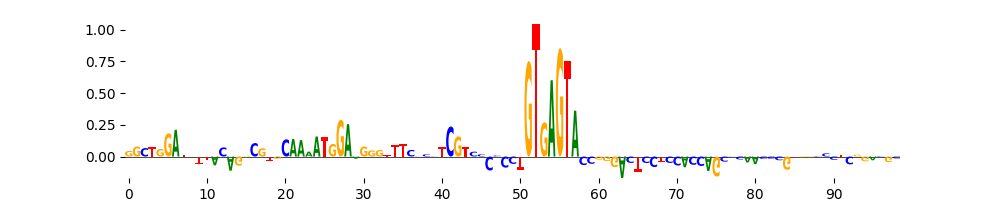

In [55]:
from IPython.display import Image

Image("example/output_classical_monoctypes_plots/SPI1_seqlogos/SPI1@267.png")

### Querying Cells

To obtain attributions, cells of interest must be selected using the query API. We support Pandas' query API functionality on the cell metadata DataFrame. Here are examples of how to write queries:

In [13]:
! decima query-cell --help

Usage: decima query-cell [OPTIONS] [QUERY]

  Query a cell using query string

  Examples:

      >>> decima query-cell 'cell_type == "classical monocyte"'     ...

      >>> decima query-cell 'cell_type == "classical monocyte" and disease ==
      "healthy" and tissue == "blood"'     ...

      >>> decima query-cell 'cell_type.str.contains("monocyte") and disease ==
      "healthy"'     ...

Options:
  --help  Show this message and exit.


Query cells of type "classical monocyte" using Pandas query syntax: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

In [14]:
! decima query-cell 'cell_type == "classical monocyte"' | column -t -s $'\t'

wandb: Currently logged in as: mhcelik (mhcw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.7 (1874.1MB/s)
          cell_type           tissue                            organ           disease                                         study                                 dataset      region  subregion  celltype_coarse  n_cells  total_counts        n_genes  size_factor         train_pearson       val_pearson         test_pearson
agg_4705  classical monocyte  alveolar system                   lung            COVID-19                                        GSE155249                             scimilarity  nan     nan                         7244     26544273.0          15325    34749.092791034054  0.946616874183219   0.8437000068912937  0.8506571540216992
agg_4706  classical monocyte  alveolar system                   lung            healthy  

Query cells that:
- have "monocyte" in their cell type name (cell_type.str.contains("monocyte"))
- are from healthy donors (disease == "healthy")

In [15]:
! decima query-cell 'cell_type.str.contains("monocyte") and disease == "healthy"' | column -t -s $'\t'

wandb: Currently logged in as: mhcelik (mhcw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.7 (1835.5MB/s)
          cell_type               tissue                            organ           disease  study                                 dataset      region  subregion  celltype_coarse  n_cells  total_counts  n_genes  size_factor         train_pearson       val_pearson         test_pearson
agg_4706  classical monocyte      alveolar system                   lung            healthy  GSE155249                             scimilarity  nan     nan                         72       218105.0      9142     30484.31888978114   0.9102228263646758  0.8083487523192785  0.8047828694155461
agg_4707  classical monocyte      ampulla of uterine tube           fallopian tube  healthy  fc77d2ae-247d-44d7-aa24-3f4859254c2c  scimilarity  nan     nan                

This query selects cells that are:
- classical monocytes (cell_type == "classical monocyte")
- from healthy donors (disease == "healthy")
- from blood tissue (tissue == "blood")

In [16]:
! decima query-cell 'cell_type == "classical monocyte" and disease == "healthy" and tissue == "blood"' | column -t -s $'\t'

wandb: Currently logged in as: mhcelik (mhcw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.7 (1862.1MB/s)
          cell_type           tissue  organ  disease  study                                 dataset      region  subregion  celltype_coarse  n_cells  total_counts  n_genes  size_factor         train_pearson       val_pearson         test_pearson
agg_4733  classical monocyte  blood   blood  healthy  03f821b4-87be-4ff4-b65a-b5fc00061da7  scimilarity  nan     nan                         32464    109280914.0   16158    33646.02843110038   0.9568728712803031  0.8545324533535094  0.8487445540580735
agg_4734  classical monocyte  blood   blood  healthy  436154da-bcf1-4130-9c8b-120ff9a888f2  scimilarity  nan     nan                         76800    206490628.0   16683    30736.453324546856  0.955313650235467   0.8494127267867799  0.84210567312908

### Attribution calling with custom genes and sequences

In this section, we demonstrate how to call attributions using custom gene sequences.
You can provide your own FASTA file containing sequences of interest and run attribution analysis
for any set of genes or genomic regions, using the Decima command-line interface.
The following examples show how to inspect your FASTA file, run attributions, and explore the output files.
The FASTA header line for each sequence contains the gene name and the coordinates of the masked region used for attribution analysis. 
For example, in the header:

    CD68|gene_mask_start=163840|gene_mask_end=166460
"CD68" is the gene name, "gene_mask_start" and "gene_mask_end" specify the start and end positions (relative to the input sequence) of the region that was masked and analyzed for attributions.

In [17]:
! cat ../tests/data/seqs.fasta | cut -c 1-200

>CD68|gene_mask_start=163840|gene_mask_end=166460
CTCTGCAGAGAGCGAGGACGGTGTGTCTGCCAGCGCCTTTGACTTCACTGTCTCCAACTTTGTGGACAACCTGTATGGCTACCCGGAAGGCAAGGATGTGCTTCGGGAGACCATCAAGTTTATGTACACAGACTGGGCCGACCGGGACAATGGCGAAATGCGCCGCAAAACCCTGCTGGCGCTCTTTACTGACCACCAAT
>SPI1|gene_mask_start=163840|gene_mask_end=187556
TGCCACTTTTAGATATGTTCATGGGTGCAGATACGGCTTTATTTATTTGAGACAGAGTTTCACTCTTGTTGCCCAGGGTGGAGTGCAGTGGTGCGATCTCAGCTCACTGCAGCCTTCGCCTCCCGGGTTGAAGCGATTCTTCTGCCTCAACCTCGAGTAGCTGGGATTATAGGCACCTGCCAGCATGCCTGGCTAATTTT


In [18]:
! decima attributions --model 0 --seqs ../tests/data/seqs.fasta --tasks "cell_type == 'classical monocyte'" --output-prefix example/output_custom_seqs

decima - INFO - Using device: cuda
decima - INFO - Loading model and metadata to compute attributions...
wandb: Currently logged in as: mhcelik (mhcw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.7 (1875.1MB/s)
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.7 (1871.0MB/s)
wandb: Downloading large artifact rep0:latest, 720.03MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.6 (1297.0MB/s)
/home/celikm5/Projects/decima/src/decima/interpret/attributer.py:43: UserWarning: `off_tasks` is not provided. Using all other tasks as off_tasks.
Computing attributions...: 100%|██████████████████| 2/2 [00:04<00:00,  2.09s/it]
decima - INFO - Saving sequences...
Saving sequences...: 2it [00:00, 4493.09it/s]
decima - INFO - Loading model and metadata to compute attributi

The output file for custom sequence also contains additional file of `seqs.fasta` which contains custom seqs. To visualize prediction on IGV, first load this fasta file and its index (.fai) to IGV, then load bam and bed files.

In [19]:
! ls example/output_custom_seqs*

example/output_custom_seqs.attributions.bigwig
example/output_custom_seqs.attributions.h5
example/output_custom_seqs.motifs.tsv
example/output_custom_seqs.seqlets.bed
example/output_custom_seqs.seqs.fasta
example/output_custom_seqs.seqs.fasta.fai
example/output_custom_seqs.warnings.qc.log


## Python User API


In [20]:
! ls example/output_classical_monoctypes.*

example/output_classical_monoctypes.attributions.bigwig
example/output_classical_monoctypes.attributions.h5
example/output_classical_monoctypes.motifs.tsv
example/output_classical_monoctypes.seqlets.bed
example/output_classical_monoctypes.warnings.qc.log


In [21]:
from decima.interpret.attributions import AttributionResult

with AttributionResult("example/output_classical_monoctypes.attributions.h5") as ar:
    seqs, attrs = ar.load(["SPI1"])
    print("seqs:", seqs)
    print("attrs:", attrs)

Loading attributions and sequences...: 100%|██████████| 1/1 [00:00<00:00, 469.84it/s]


seqs: [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 1. 0. ... 1. 0. 1.]
  [1. 0. 0. ... 0. 1. 0.]]]
attrs: [[[-5.04877644e-05 -3.64095758e-05  7.14814905e-06 ... -1.40671709e-05
   -5.00998385e-06 -6.19171897e-06]
  [-5.04877644e-05 -3.64095758e-05 -2.14444472e-05 ... -1.40671709e-05
   -5.00998385e-06 -6.19171897e-06]
  [-5.04877644e-05  1.09228728e-04  7.14814905e-06 ...  4.22015128e-05
   -5.00998385e-06  1.85751569e-05]
  [ 1.51463293e-04 -3.64095758e-05  7.14814905e-06 ... -1.40671709e-05
    1.50299516e-05 -6.19171897e-06]]]


Let's look at a simple example using Decima's Python API to analyze the SPI1 gene, which is a key transcription factor in myeloid cell development. We'll examine its regulation across different monocyte and macrophage cell types where it is known to be important.

First we choice the cells, we are interested in:


In [22]:
with AttributionResult("example/output_classical_monoctypes.attributions.h5") as ar:
    attribution = ar.load_attribution("SPI1")

wandb: Currently logged in as: mhcelik (mhcw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.7 (1889.1MB/s)


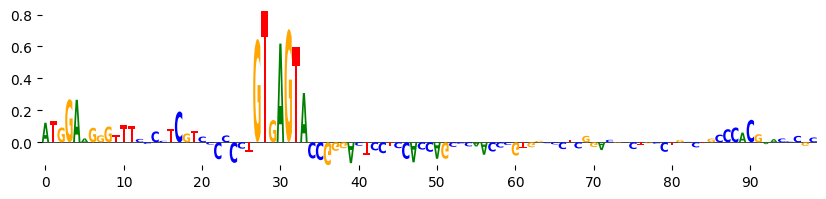

In [23]:
import matplotlib.pyplot as plt

attribution.plot_seqlogo(relative_loc=291)
plt.show()

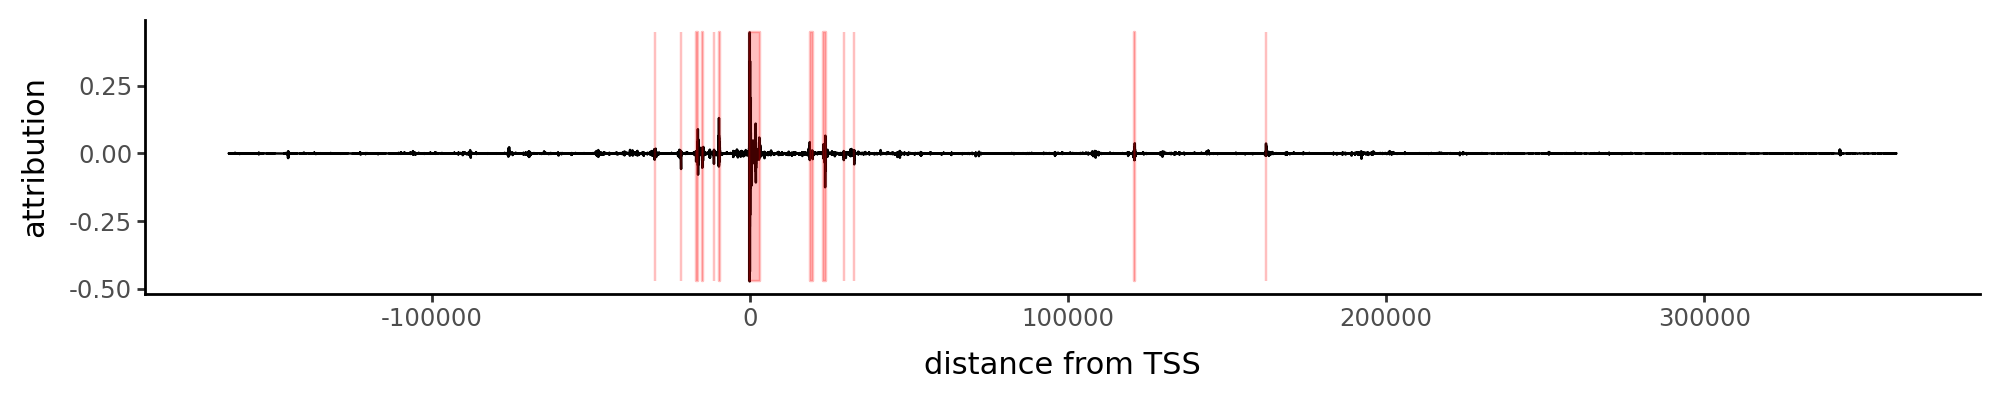

In [24]:
attribution.plot_peaks()

In [25]:
import torch
from decima import predict_attributions_seqlet_calling

device = "cuda" if torch.cuda.is_available() else "cpu"

%matplotlib inline

In [26]:
spi1_cell_types = [
    "classical monocyte",
    "intermediate monocyte",
    "non-classical monocyte",
    "alveolar macrophage",
    "macrophage",
]

In [27]:
predict_attributions_seqlet_calling(
    output_prefix="example/attrs_SP1I_monoctypes",
    genes=["SPI1"],
    tasks=f"cell_type in {spi1_cell_types}",
    device=device,
)

wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.7 (1882.9MB/s)
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.6 (1896.2MB/s)
wandb: Downloading large artifact rep0:latest, 720.03MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (1362.8MB/s)
/home/celikm5/Projects/decima/src/decima/interpret/attributer.py:43: UserWarning: `off_tasks` is not provided. Using all other tasks as off_tasks.
Computing attributions...: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.7 (1879.2MB/s)
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.7 (1872.4MB/s)
wandb: Downloading large artifact rep1:latest, 720.03MB. 1 files... 
wandb:   1 of 1 files downloade

Similar to command line you can use `predict_save_attributions` and `recursive_seqlet_calling` functions calls attirubitions and seqlets step by step.

### Custom Sequences

Attributions for a custom sequence can be calculated by passing data frame with columns of `seq`, `gene_mask_start`, `gene_mask_end`. The index of the DataFrame will be used as gene names. 

In [28]:
import pandas as pd

df_seqs = pd.read_csv("../tests/data/seqs.csv", index_col=0)
df_seqs

,seq,gene_mask_start,gene_mask_end
name,,,
CD68,CTCTGCAGAGAGCGAGGACGGTGTGTCTGCCAGCGCCTTTGACTTC...,163840,166460
SPI1,TGCCACTTTTAGATATGTTCATGGGTGCAGATACGGCTTTATTTAT...,163840,187556


In [29]:
predict_attributions_seqlet_calling(
    output_prefix="example/attrs_custom_seqs_monoctypes",
    seqs=df_seqs,  # <-- custom sequences
    tasks=f"cell_type in {spi1_cell_types}",
    device=device,
)
! ls attrs_custom_seqs_monoctypes

wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.6 (1898.7MB/s)
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.7 (1844.3MB/s)
wandb: Downloading large artifact rep0:latest, 720.03MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.6 (1285.9MB/s)
/home/celikm5/Projects/decima/src/decima/interpret/attributer.py:43: UserWarning: `off_tasks` is not provided. Using all other tasks as off_tasks.
Computing attributions...: 100%|██████████| 2/2 [00:03<00:00,  1.66s/it]
Saving sequences...: 2it [00:00, 3483.64it/s]
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.6 (1928.9MB/s)
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.7 (1873.0MB/s)
wandb: Downloading large artifact rep1:latest, 720.03M

ls: cannot access 'attrs_custom_seqs_monoctypes': No such file or directory


In [30]:
import random
import torch
from grelu.sequence.format import strings_to_one_hot
from decima.constants import DECIMA_CONTEXT_SIZE

DECIMA_CONTEXT_SIZE

524288

In [31]:
seqs = torch.cat(
    [
        strings_to_one_hot(
            ["".join(random.choice(["A", "T", "C", "G"]) for _ in range(DECIMA_CONTEXT_SIZE))]
        ),  # one-hot encoded sequence
        torch.ones(1, 1, DECIMA_CONTEXT_SIZE),  # binary mask for the gene
    ],
    dim=1,
)
seqs.shape

torch.Size([1, 5, 524288])

In [32]:
predict_attributions_seqlet_calling(
    output_prefix="example/attrs_custom_tensors_monoctypes",
    seqs=seqs,  # <-- custom sequences as torch.Tensor where (batch_size, 5, seq_len), second dimension is one-hot encoded sequence and binary mask for the gene
    tasks=f"cell_type in {spi1_cell_types}",
    device=device,
    model=0,
    threshold=1e-6,
)

wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.7 (1885.6MB/s)
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.7 (1888.6MB/s)
wandb: Downloading large artifact rep0:latest, 720.03MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (1335.1MB/s)
/home/celikm5/Projects/decima/src/decima/interpret/attributer.py:43: UserWarning: `off_tasks` is not provided. Using all other tasks as off_tasks.
Computing attributions...: 100%|██████████| 1/1 [00:01<00:00,  1.79s/it]
Saving sequences...: 1it [00:00, 3806.08it/s]
wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.7 (1854.2MB/s)
Computing recursive seqlet calling...: 100%|██████████| 1/1 [00:00<00:00, 1219.63it/s]
/home/celikm5/miniforge3/envs/decima/lib/python3.11/site-packages/memelite/fimo.py:406: FutureWarning: T

In [33]:
! ls example/attrs_custom_tensors_monoctypes*

example/attrs_custom_tensors_monoctypes.attributions.bigwig
example/attrs_custom_tensors_monoctypes.attributions.h5
example/attrs_custom_tensors_monoctypes.motifs.tsv
example/attrs_custom_tensors_monoctypes.seqlets.bed
example/attrs_custom_tensors_monoctypes.seqs.fasta
example/attrs_custom_tensors_monoctypes.seqs.fasta.fai
example/attrs_custom_tensors_monoctypes.warnings.qc.log


### Advance Developer API

`DecimaResult` provides a unified interface for working with Decima results in anndata format. It contains an AnnData structure storing cell x gene expression data and metadata. Through DecimaResult, users can load pre-trained models, compute attributions to  understand genomic regulation, and analyze results through visualizations or export to genomic file formats. The object provides convenient access to cell and gene annotations through its metadata properties.

In [34]:
from decima import DecimaResult

result = DecimaResult.load()

wandb: Downloading large artifact metadata:latest, 3122.32MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:1.7 (1877.9MB/s)


In [35]:
result.cell_metadata.query("cell_type.str.endswith('macrophage')")

,cell_type,tissue,organ,disease,study,dataset,region,subregion,celltype_coarse,n_cells,total_counts,n_genes,size_factor,train_pearson,val_pearson,test_pearson
agg_4063,alveolar macrophage,alveolar system,lung,COVID-19,GSE155249,scimilarity,nan,nan,NaN,1453,8.001524e+06,14711,36293.472025,0.943059,0.837210,0.849998
agg_4064,alveolar macrophage,alveolar system,lung,healthy,GSE155249,scimilarity,nan,nan,NaN,1279,7.598244e+06,13673,34158.514496,0.932819,0.831024,0.843684
agg_4065,alveolar macrophage,left lung,lung,NA,ENCODE,scimilarity,nan,nan,NaN,405,3.000961e+06,16595,46501.375857,0.936081,0.847924,0.845485
agg_4066,alveolar macrophage,lingula of left lung,lung,healthy,a3ffde6c-7ad2-498a-903c-d58e732f7470,scimilarity,nan,nan,NaN,854,1.713753e+06,15110,42773.009735,0.893927,0.806000,0.804835
agg_4067,alveolar macrophage,lower lobe of left lung,lung,NA,ENCODE,scimilarity,nan,nan,NaN,763,1.344798e+07,17973,49020.804487,0.940586,0.854680,0.863014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
agg_6644,macrophage,uterus,uterus,healthy,32f2fd23-ec74-486f-9544-e5b2f41725f5,scimilarity,nan,nan,NaN,425,4.340830e+06,15233,36624.136739,0.954753,0.850247,0.843175
agg_6645,macrophage,uterus,uterus,healthy,e5f58829-1a66-40b5-a624-9046778e74f5,scimilarity,nan,nan,NaN,231,3.007554e+07,14787,27615.762157,0.839476,0.730554,0.719085
agg_6646,macrophage,vasculature,vasculature,healthy,e5f58829-1a66-40b5-a624-9046778e74f5,scimilarity,nan,nan,NaN,12497,4.040685e+08,18199,36829.498964,0.938862,0.836819,0.833474
agg_6647,macrophage,visceral fat,adipose,obesity,GSE128518,scimilarity,nan,nan,NaN,729,2.078431e+06,13760,34188.716187,0.941596,0.827360,0.823912


The results and metadata stored in anndata format which you can access directly if needed but most operation are supported by DecimaResult object.

In [36]:
result.anndata

AnnData object with n_obs × n_vars = 8856 × 18457
    obs: 'cell_type', 'tissue', 'organ', 'disease', 'study', 'dataset', 'region', 'subregion', 'celltype_coarse', 'n_cells', 'total_counts', 'n_genes', 'size_factor', 'train_pearson', 'val_pearson', 'test_pearson'
    var: 'chrom', 'start', 'end', 'strand', 'gene_type', 'frac_nan', 'mean_counts', 'n_tracks', 'gene_start', 'gene_end', 'gene_length', 'gene_mask_start', 'gene_mask_end', 'frac_N', 'fold', 'dataset', 'gene_id', 'pearson', 'size_factor_pearson', 'ensembl_canonical_tss'
    layers: 'preds', 'v1_rep0', 'v1_rep1', 'v1_rep2', 'v1_rep3'

These are the cell metadata contained in the Decima object.

In [37]:
result.cell_metadata

,cell_type,tissue,organ,disease,study,dataset,region,subregion,celltype_coarse,n_cells,total_counts,n_genes,size_factor,train_pearson,val_pearson,test_pearson
agg_0,Amygdala excitatory,Amygdala_Amygdala,CNS,healthy,jhpce#tran2021,brain_atlas,Amygdala,Amygdala,NaN,331,1.592883e+07,17000,41431.465186,0.942459,0.841377,0.865640
agg_1,Amygdala excitatory,Amygdala_Basolateral nuclear group (BLN) - lat...,CNS,healthy,SCR_016152,brain_atlas,Amygdala,Basolateral nuclear group (BLN) - lateral nucl...,NaN,11369,2.952133e+08,18080,40765.341481,0.943098,0.838936,0.861092
agg_2,Amygdala excitatory,Amygdala_Bed nucleus of stria terminalis and n...,CNS,healthy,SCR_016152,brain_atlas,Amygdala,Bed nucleus of stria terminalis and nearby - BNST,NaN,139,2.593231e+06,15418,42556.387020,0.952170,0.854544,0.866654
agg_3,Amygdala excitatory,Amygdala_Central nuclear group - CEN,CNS,healthy,SCR_016152,brain_atlas,Amygdala,Central nuclear group - CEN,NaN,3892,9.946371e+07,17959,42884.641430,0.959744,0.863585,0.881554
agg_4,Amygdala excitatory,Amygdala_Corticomedial nuclear group (CMN) - a...,CNS,healthy,SCR_016152,brain_atlas,Amygdala,Corticomedial nuclear group (CMN) - anterior c...,NaN,2945,1.281619e+08,17885,41816.741933,0.951365,0.854304,0.868902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
agg_9533,vascular associated smooth muscle cell,upper lobe of right lung,lung,NA,ENCODE,scimilarity,nan,nan,NaN,21,3.483375e+04,8515,35404.911768,0.735213,0.665647,0.654491
agg_9535,vascular associated smooth muscle cell,urinary bladder,urinary,healthy,GSE129845,scimilarity,nan,nan,NaN,24,8.498500e+04,7337,26189.415789,0.809852,0.690022,0.656160
agg_9536,vascular associated smooth muscle cell,uterus,uterus,NA,ENCODE,scimilarity,nan,nan,NaN,272,5.700762e+05,14769,44938.403867,0.915329,0.808941,0.839993
agg_9537,vascular associated smooth muscle cell,uterus,uterus,healthy,e5f58829-1a66-40b5-a624-9046778e74f5,scimilarity,nan,nan,NaN,472,1.089170e+07,14514,30145.422152,0.852339,0.717682,0.727469


Similarly, these are the gene metadata contained in the Decima object.

In [38]:
result.gene_metadata

,chrom,start,end,strand,gene_type,frac_nan,mean_counts,n_tracks,gene_start,gene_end,gene_length,gene_mask_start,gene_mask_end,frac_N,fold,dataset,gene_id,pearson,size_factor_pearson,ensembl_canonical_tss
STRADA,chr17,63381538,63905826,-,protein_coding,0.000000,2.208074,7616,63682336,63741986,59650,163840,223490,0.000000,['fold1'],train,ENSG00000266173,0.469923,0.476627,63741799.0
ETV4,chr17,43219172,43743460,-,protein_coding,0.030873,0.925863,5004,43527844,43579620,51776,163840,215616,0.000000,['fold1'],train,ENSG00000175832,0.738092,0.613281,43546340.0
USP25,chr21,15566185,16090473,+,protein_coding,0.000000,3.650355,8604,15730025,15880069,150044,163840,313884,0.000000,['fold6'],train,ENSG00000155313,0.905222,0.784446,15729982.0
ZSWIM5,chr1,44945761,45470049,-,protein_coding,0.000620,2.190115,6123,45016399,45306209,289810,163840,453650,0.000000,['fold5'],train,ENSG00000162415,0.961772,0.795131,45206605.0
C21orf58,chr21,45963427,46487715,-,protein_coding,0.000791,1.650467,7354,46300181,46323875,23694,163840,187534,0.000000,['fold6'],train,ENSG00000160298,0.645268,0.412368,46323870.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NPDC1,chr9,136685731,137210019,-,protein_coding,0.000000,2.625285,7852,137039463,137046179,6716,163840,170556,0.000000,['fold3'],test,ENSG00000107281,0.316322,0.178204,137046177.0
ZNF425,chr7,148765876,149290164,-,protein_coding,0.001048,1.292957,6511,149102784,149126324,23540,163840,187380,0.000000,['fold7'],train,ENSG00000204947,0.821292,0.737081,149126324.0
COL5A1,chr9,134477934,135002222,+,protein_coding,0.002159,1.492664,6209,134641774,134844843,203069,163840,366909,0.000000,['fold3'],test,ENSG00000130635,0.766624,0.456999,134641803.0
BRD3,chr9,133708087,134232375,-,protein_coding,0.000000,3.190450,8675,134030305,134068535,38230,163840,202070,0.004662,['fold3'],test,ENSG00000169925,0.344062,0.280283,134068026.0


You can also access the genes and cells:

In [39]:
result.genes

Index(['STRADA', 'ETV4', 'USP25', 'ZSWIM5', 'C21orf58', 'MIR497HG', 'CFAP74',
       'GSE1', 'LPP', 'CLK1',
       ...
       'STRIP2', 'TNFRSF1A', 'RBM14-RBM4', 'C1orf21', 'LINC00639', 'NPDC1',
       'ZNF425', 'COL5A1', 'BRD3', 'EVI5L'],
      dtype='object', length=18457)

Cell indexes can be also accessed:

In [40]:
result.cells

Index(['agg_0', 'agg_1', 'agg_2', 'agg_3', 'agg_4', 'agg_5', 'agg_6', 'agg_7',
       'agg_8', 'agg_9',
       ...
       'agg_9528', 'agg_9529', 'agg_9530', 'agg_9531', 'agg_9532', 'agg_9533',
       'agg_9535', 'agg_9536', 'agg_9537', 'agg_9538'],
      dtype='object', length=8856)

Predicted gene expression for specific gene can be accessed:

In [41]:
result.predicted_expression_matrix(genes=["SPI1"])

,SPI1
agg_0,0.256442
agg_1,0.221014
agg_2,0.179371
agg_3,0.219646
agg_4,0.217516
...,...
agg_9533,0.493780
agg_9535,0.292091
agg_9536,0.370765
agg_9537,0.168036


Or for all the genes:

In [42]:
result.predicted_expression_matrix()

,STRADA,ETV4,USP25,ZSWIM5,C21orf58,MIR497HG,CFAP74,GSE1,LPP,CLK1,...,STRIP2,TNFRSF1A,RBM14-RBM4,C1orf21,LINC00639,NPDC1,ZNF425,COL5A1,BRD3,EVI5L
agg_0,2.973438,1.845565,4.592531,5.099802,1.774879,0.356812,2.590836,4.629774,4.897171,3.326940,...,2.836060,0.297015,1.883849,4.293593,1.463565,3.183534,2.340202,2.374942,2.911916,3.230072
agg_1,2.954213,1.896726,4.688557,5.510440,1.666929,0.352725,2.292625,4.459535,4.915286,3.192858,...,3.125704,0.242543,1.908177,4.439424,1.236739,3.494824,2.425672,2.054568,2.713408,3.491463
agg_2,2.938851,2.197247,4.861410,5.617520,1.773381,0.380867,2.394917,4.415038,4.836399,3.390717,...,3.082098,0.263285,2.006456,4.383455,1.208590,4.013819,2.408381,2.297343,2.892222,3.695785
agg_3,3.045972,2.138573,4.863791,5.273604,1.760097,0.463555,2.391702,3.940975,4.857763,3.410926,...,2.882890,0.290327,1.922963,4.550189,1.430520,3.693118,2.297103,2.121887,2.626117,3.223912
agg_4,3.025518,2.019096,4.602948,5.257001,1.755338,0.382190,2.432810,4.392480,4.959488,3.250500,...,3.082296,0.258540,2.038277,4.464807,1.249043,3.665800,2.400820,2.255862,2.925619,3.471005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
agg_9533,2.333562,0.633322,4.675825,2.793023,0.752030,0.692083,0.503531,4.327948,6.903193,3.695593,...,0.549795,2.270181,1.563218,4.395422,0.550088,1.330252,1.044471,3.759369,2.491346,1.872717
agg_9535,0.835037,0.358773,1.964896,0.307449,0.337240,0.834196,0.093885,1.853794,3.700790,4.467302,...,0.176885,1.370898,1.022708,3.400267,0.052162,1.908870,0.253417,1.448111,1.622033,1.064292
agg_9536,3.008039,1.209324,4.798392,3.931870,1.401328,1.638555,0.969720,4.779201,6.631931,4.127797,...,1.174298,1.870530,2.506874,5.151776,0.967644,1.809947,2.205356,4.244005,2.974467,2.659873
agg_9537,1.241936,0.455059,2.919995,0.571672,0.486448,1.175586,0.145397,2.412148,4.759118,4.913945,...,0.371035,1.361073,1.668085,4.005738,0.078611,1.571750,0.508187,2.067150,2.323764,1.429850


In [43]:
result.load_model(device=device)

wandb: Downloading large artifact rep0:latest, 720.03MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (1332.8MB/s)


DecimaResult(anndata=AnnData object with n_obs × n_vars = 8856 × 18457
    obs: 'cell_type', 'tissue', 'organ', 'disease', 'study', 'dataset', 'region', 'subregion', 'celltype_coarse', 'n_cells', 'total_counts', 'n_genes', 'size_factor', 'train_pearson', 'val_pearson', 'test_pearson'
    var: 'chrom', 'start', 'end', 'strand', 'gene_type', 'frac_nan', 'mean_counts', 'n_tracks', 'gene_start', 'gene_end', 'gene_length', 'gene_mask_start', 'gene_mask_end', 'frac_N', 'fold', 'dataset', 'gene_id', 'pearson', 'size_factor_pearson', 'ensembl_canonical_tss'
    layers: 'preds', 'v1_rep0', 'v1_rep1', 'v1_rep2', 'v1_rep3')

Prepare an input for th SPI1 genes.


Takes around ~10 seconds on GPU and ~5 minutes to call attributions on CPU. 

In [44]:
attrs = result.attributions(
    gene="SPI1",
    tasks=result.query_cells(f"cell_type in {spi1_cell_types}"),
    off_tasks=result.query_cells(f'organ == "blood" and cell_type not in {spi1_cell_types}'),
)

Attributions can be visualized and processed with attributions object:

In [45]:
attrs.peaks

,peak,start,end,attribution,p-value,from_tss
0,pos.SPI1@37,163877,163902,12.738598,2.189116e-11,37
1,pos.SPI1@-121,163719,163744,5.578619,1.900737e-05,-121
2,pos.SPI1@-57,163783,163803,9.269885,3.052090e-05,-57
3,pos.SPI1@62,163902,163909,1.285628,3.080049e-05,62
4,pos.SPI1@-79,163761,163765,0.832053,6.105891e-05,-79
...,...,...,...,...,...,...
72,neg.SPI1@-22,163818,163836,-11.178307,4.889269e-04,-22
73,neg.SPI1@443,164283,164293,-0.718594,4.918033e-04,443
74,neg.SPI1@32783,196623,196630,-0.460660,4.924140e-04,32783
75,neg.SPI1@-21806,142034,142040,-0.328668,4.924140e-04,-21806


In [46]:
attrs.peaks_to_bed()

,chrom,start,end,name,score,strand,attribution
41,chr11,47216350,47216357,pos.SPI1@162219,3,.,0.542525
45,chr11,47257597,47257605,pos.SPI1@120971,3,.,0.679172
65,chr11,47257633,47257637,neg.SPI1@120939,3,.,-0.220710
62,chr11,47257734,47257739,neg.SPI1@120837,3,.,-0.273576
44,chr11,47345731,47345736,neg.SPI1@32840,3,.,-0.296525
...,...,...,...,...,...,...,...
70,chr11,47395483,47395492,neg.SPI1@-16916,3,.,-0.567591
40,chr11,47400211,47400221,neg.SPI1@-21645,3,.,-0.898548
38,chr11,47400225,47400235,neg.SPI1@-21659,3,.,-0.727634
75,chr11,47400376,47400382,neg.SPI1@-21806,3,.,-0.328668


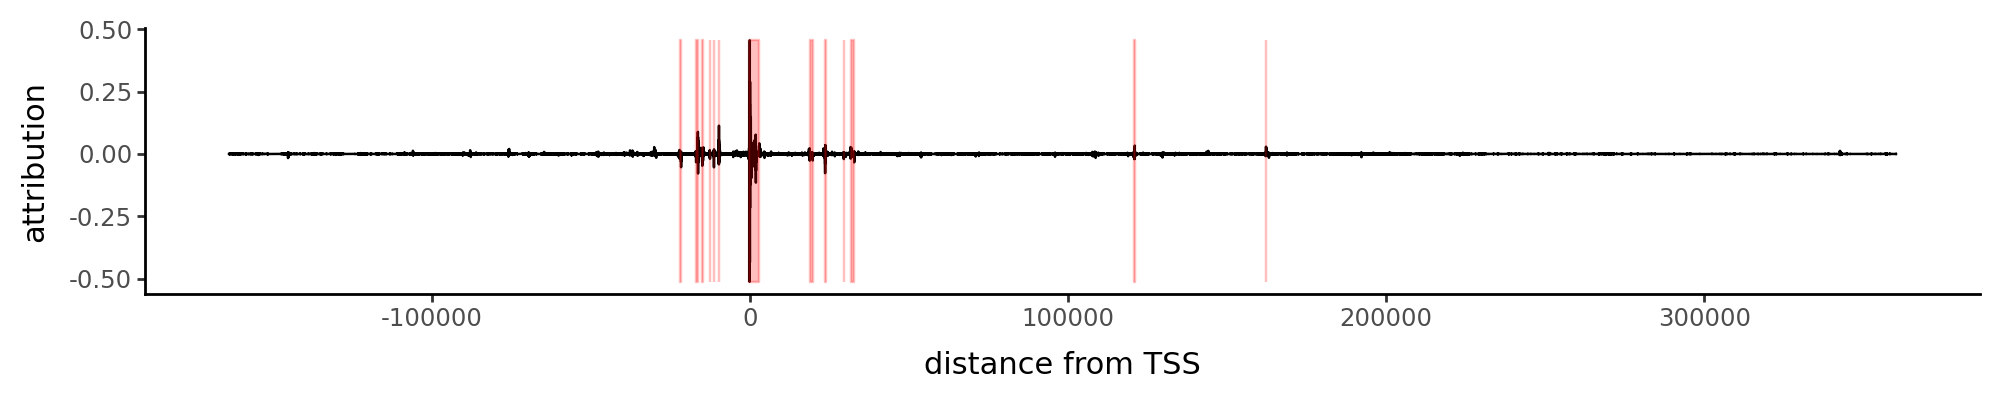

In [47]:
attrs.plot_peaks()

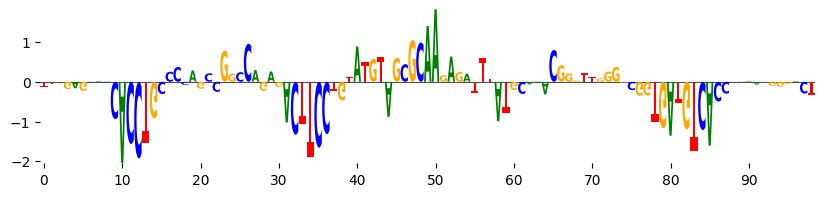

In [48]:
import matplotlib.pyplot as plt

attrs.plot_seqlogo(relative_loc=-45)
plt.show()

This comment takes around ~1 minutes and detects motifs in the attributions using FIMO. The motifs are ranked by their attribution scores:

In [49]:
df_motifs = attrs.scan_motifs()
df_motifs

,motif,peak,start,end,strand,score,p-value,matched_seq,site_attr_score,motif_attr_score,from_tss
2918,KLF7.H13CORE.0.P.B,neg.SPI1@1813,165662,165672,+,15.217368,0.000000e+00,GGGGGCGGGG,0.009462,0.027049,1822
7458,KLF7.H13CORE.0.P.B,pos.SPI1@1820,165662,165672,+,15.217368,0.000000e+00,GGGGGCGGGG,0.009462,0.027049,1822
2992,KLF7.H13CORE.0.P.B,neg.SPI1@1832,165662,165672,+,15.217368,0.000000e+00,GGGGGCGGGG,0.009462,0.027049,1822
2068,RXRB.H13CORE.2.PS.A,neg.SPI1@1182,165019,165030,-,12.213856,0.000000e+00,CCATGACCTCT,-0.008296,-0.024166,1179
3882,ZNF746.H13CORE.0.PSG.A,neg.SPI1@1917,165744,165770,-,26.355452,7.435328e-10,AGGGAGGAGGGAGGAAGGTGGGAGGA,-0.010776,-0.016254,1904
...,...,...,...,...,...,...,...,...,...,...,...
5618,ZN394.H13CORE.0.P.C,pos.SPI1@-144,163691,163710,-,6.136955,4.997442e-04,TCCCAGCTTCCTCTGGGCA,0.028328,0.048309,-149
5894,ZN394.H13CORE.0.P.C,pos.SPI1@-150,163691,163710,-,6.136955,4.997442e-04,TCCCAGCTTCCTCTGGGCA,0.028328,0.048309,-149
3069,ZNF30.H13CORE.0.P.C,neg.SPI1@1832,165664,165687,+,7.201793,4.997881e-04,GGGCGGGGAGGCCTGATGACTGT,0.008337,0.010769,1824
4702,ZN543.H13CORE.0.P.C,neg.SPI1@19730,183562,183583,-,6.760764,4.998900e-04,TGGGGAGACAGGTGGGGCACC,-0.005565,-0.008536,19722


If you just want attribution tensor from input one_hot encoded sequence prepare your input and call attributions object:

In [50]:
one_hot_seq, gene_mask = result.prepare_one_hot("SPI1")
inputs = torch.vstack([one_hot_seq, gene_mask]).unsqueeze(0)
inputs.shape  # (batch_size, 5, seq_len)

torch.Size([1, 5, 524288])

In [51]:
from decima.interpret.attributer import DecimaAttributer

attributer = DecimaAttributer(
    model=result.model,
    tasks=result.query_cells(f"cell_type in {spi1_cell_types}"),
    off_tasks=result.query_cells(f'organ == "blood" and cell_type not in {spi1_cell_types}'),
    transform="specificity",
    method="inputxgradient",
)
attrs = attributer.attribute(inputs=inputs)

attrs  # (batch_size, 4, seq_len) gene mask is removed from final attributions

tensor([[[-0.0000e+00,  0.0000e+00, -0.0000e+00,  ..., -0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [-0.0000e+00, -0.0000e+00, -2.7323e-05,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [-0.0000e+00,  1.2544e-04,  0.0000e+00,  ...,  3.7231e-05,
          -0.0000e+00,  1.4978e-05],
         [ 1.7231e-04, -0.0000e+00,  0.0000e+00,  ..., -0.0000e+00,
           1.2230e-05, -0.0000e+00]]], device='cuda:0')